# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (Scaling in)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 8

Define max number of positions to scale into

In [5]:
max_positions = 4

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
s.rlog.tail(10)

,date,price,shares,entry_exit,symbol
570,2019-12-03,309.55,18,entry,
571,2019-12-12,317.13,18,exit,
572,2020-01-27,323.50,18,entry,
573,2020-01-31,321.73,18,entry,
574,2020-02-04,329.06,36,exit,
575,2020-02-21,333.48,17,entry,
576,2020-02-24,322.42,18,entry,
577,2020-02-25,312.65,19,entry,
578,2020-02-26,311.50,20,entry,
579,2020-03-26,261.20,74,exit,


In [9]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
400,2019-09-23,298.21,2019-10-11,296.28,-1.93,-38.60,20,13485.30,
401,2019-09-24,295.87,2019-10-11,296.28,0.41,8.20,20,13493.50,
402,2019-09-27,295.40,2019-10-11,296.28,0.88,17.60,20,13511.11,
403,2019-12-03,309.55,2019-12-12,317.13,7.58,136.44,18,13647.55,
404,2020-01-27,323.50,2020-02-04,329.06,5.56,100.08,18,13747.63,
405,2020-01-31,321.73,2020-02-04,329.06,7.33,131.94,18,13879.57,
406,2020-02-21,333.48,2020-03-26,261.20,-72.28,-1228.76,17,12650.81,
407,2020-02-24,322.42,2020-03-26,261.20,-61.22,-1101.96,18,11548.85,
408,2020-02-25,312.65,2020-03-26,261.20,-51.45,-977.55,19,10571.30,
409,2020-02-26,311.50,2020-03-26,261.20,-50.30,-1006.00,20,9565.30,


In [10]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-04-17,19565.30,19565.30,19565.30,0,19565.30,-
2020-04-20,19565.30,19565.30,19565.30,0,19565.30,-
2020-04-21,19565.30,19565.30,19565.30,0,19565.30,-
2020-04-22,19565.30,19565.30,19565.30,0,19565.30,-
2020-04-23,19565.30,19565.30,19565.30,0,19565.30,-


Generate strategy stats - display all available stats

In [11]:
pf.print_full(stats)

start                                                   2000-01-03
end                                                     2020-04-23
beginning_balance                                            10000
ending_balance                                            19565.30
total_net_profit                                           9565.30
gross_profit                                              20626.01
gross_loss                                               -11060.71
profit_factor                                                 1.86
return_on_initial_capital                                    95.65
annual_return_rate                                            3.36
trading_period                           20 years 3 months 20 days
pct_time_in_market                                           27.85
total_num_trades                                               410
trades_per_year                                              20.19
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2020-04-23 00:00:00 SELL 68 SPY @ 279.08


Plot Equity Curves: Strategy vs Benchmark

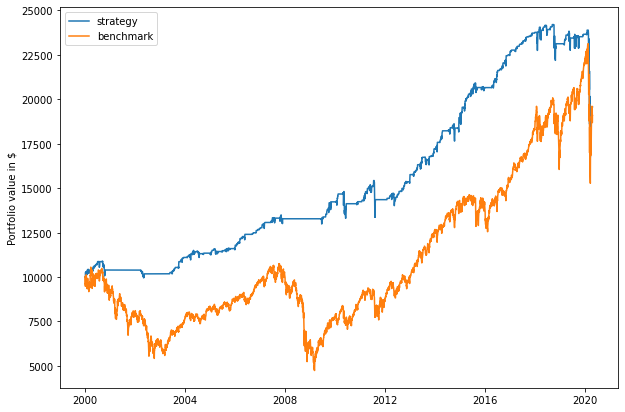

In [13]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

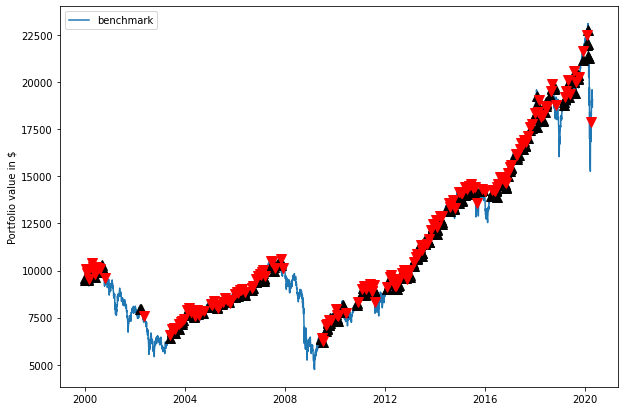

In [14]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,3.36,3.24
max_closed_out_drawdown,-30.83,-55.89
drawdown_annualized_return,-9.17,-17.28
drawdown_recovery,-1.53,-1.42
best_month,16.91,22.91
worst_month,-29.36,-31.24
sharpe_ratio,0.43,0.26
sortino_ratio,0.24,0.33
monthly_std,1.80,4.64


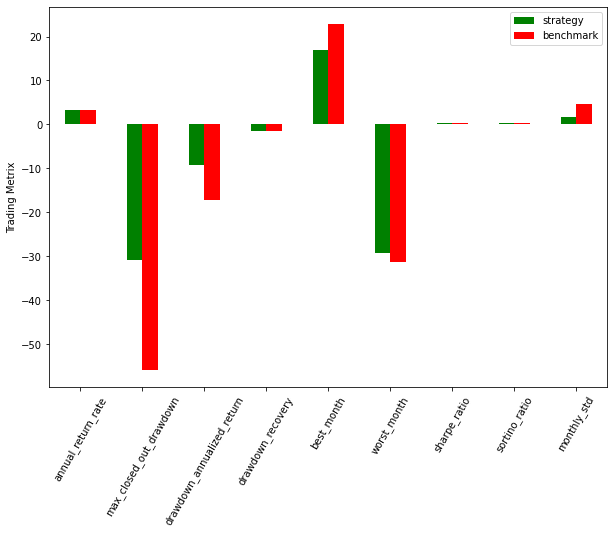

In [15]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df